In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
df = pd.read_csv('iris.csv')
df.head()

,sl,sw,pl,pw,sp
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
scaler = StandardScaler()
scaler.fit(df.drop('sp',axis=1))
scaled = scaler.transform(df.drop('sp',axis=1))
df_feat = pd.DataFrame(scaled,columns=df.columns[:-1])
df_feat.head()

,sl,sw,pl,pw
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [64]:
neighbors = np.arange(1,21)
train_accuracy = []
test_accuracy = []
train_error = []
test_error = []

for i,k in enumerate(neighbors):
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(scaled, df['sp'], test_size=0.33, random_state=j)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        pred_y1 = knn.predict(X_train)
        pred_y2 = knn.predict(X_test)
        train_accuracy.append(np.mean(pred_y1 == y_train)*100)
        test_accuracy.append(np.mean(pred_y2 == y_test)*100)
        train_error.append(np.mean(pred_y1 != y_train)*100)
        test_error.append(np.mean(pred_y2 != y_test)*100)

In [65]:
# Average across number of repetitions
accmat_trn = np.reshape(train_accuracy,(20,20))
accmat_test = np.reshape(test_accuracy,(20,20))
acc_avg_trn = accmat_trn.mean(1)
acc_avg_test = accmat_test.mean(1)

errmat_train = np.reshape(train_error,(20,20))
errmat_test = np.reshape(test_error, (20,20))
err_avg_trn = errmat_train.mean(1)
err_avg_test = errmat_test.mean(1)

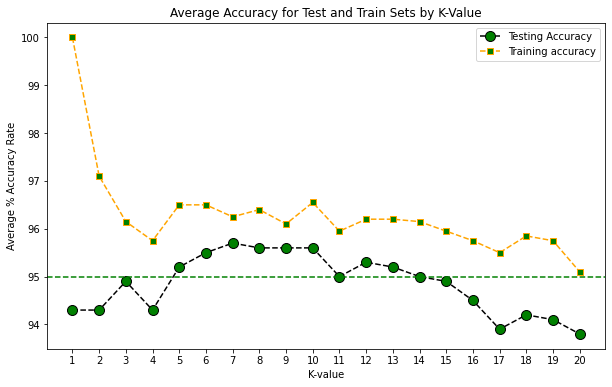

In [66]:
#Generate plot for Average Accuracy for Train and Test Sets

plt.figure(figsize=(10,6))
plt.title('Average Accuracy for Test and Train Sets by K-Value')
plt.plot(neighbors, acc_avg_test, linestyle='dashed',color='black',marker = 'o', markerfacecolor = 'green', markersize=10, label='Testing Accuracy')
plt.plot(neighbors, acc_avg_trn, linestyle='dashed', color='orange',marker = 's', markerfacecolor = 'green', markersize=6, label='Training accuracy')
plt.axhline(y = 95, color = 'g', linestyle = '--')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Average % Accuracy Rate')
plt.xticks(list(range(1,max(neighbors)+1)),[str(i) for i in range(1,max(neighbors)+1)]);


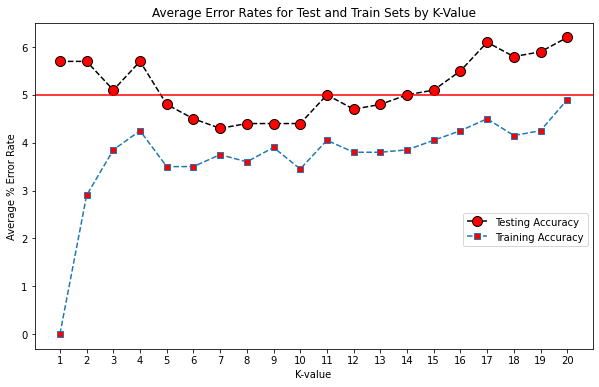

In [67]:
# Generate Plot for Average Error Rate

plt.figure(figsize=(10,6))
plt.title('Average Error Rates for Test and Train Sets by K-Value')
plt.plot(neighbors, err_avg_test, linestyle='dashed',color='black',marker = 'o', markerfacecolor = 'red', markersize=10, label='Testing Accuracy')
plt.plot(neighbors, err_avg_trn, linestyle='dashed', marker = 's', markerfacecolor = 'red', markersize=6, label='Training Accuracy')
plt.axhline(y = 5, color = 'r', linestyle = '-')
plt.xlabel('K-value')
plt.ylabel('Average % Error Rate')
plt.legend(bbox_to_anchor = (1.0, 0.3), loc = 'lower right')
plt.xticks(list(range(1,max(neighbors)+1)),[str(i) for i in range(1,max(neighbors)+1)]);

In [68]:
# Just for Fun: Confusion Matrix for k=7 ("Best" k-value in terms of average accuracy) -> Note that this is just one interation, not an average, so it's highly unreliable
X_train, X_test, y_train, y_test = train_test_split(scaled, df['sp'], test_size=0.33)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0  0]
 [ 0 18  4]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.82      0.90        22
           2       0.73      1.00      0.85        11

    accuracy                           0.92        50
   macro avg       0.91      0.94      0.92        50
weighted avg       0.94      0.92      0.92        50

